# Network Schematas - Thaliana
The per node network schematas for the Arabidobis Thaliana Boolean Model

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [244]:
from __future__ import division
import math
import numpy as np
import pandas as pd
import graphviz
import cana
from cana.networks.bio import THALIANA
from IPython.display import Image, display, Math, Latex
from IPython.core.display import HTML

In [250]:
def multi_column_display(objs, titles=['',''], cols=2):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'><h3>{{title}}</h3>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=obj,title=title) for obj,title in zip(objs,titles) ]
    cells += (cols - (len(objs)%cols)) * [html_cell.format(content="",title="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

In [245]:
T = THALIANA()
print T

<BNetwork(Name='', N=15, Nodes=['AP3', 'UFO', 'FUL', 'FT', 'AP1', 'EMF1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'PI', 'SEP'])>


## Effective Graph

In [246]:
Tsg = T.get_structural_graph()

In [247]:
# Calculates Node position in a circle. Used to plot nodes always in the same position.
nodes = {d['label']:i for i,d in Tsg.nodes(data=True)}
pos = {}
for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
    r = 160
    x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
    pos[ nodes[name] ] = (x,y)
# Nodes not on the circle. Manually position them = UFO, LUG, CLF
for name,(x,y) in zip(['UFO','LUG','CLF'], [(200.,140.),(240.,50.),(240.,-50.)]):
    pos[ nodes[name] ] = (x,y)

In [248]:
# Calculate Effective Graph
threshold = 0.00
Teg = T.get_effective_graph(mode='input',bound='upper', threshold=threshold)

Nodes: 15 | Edges: 43


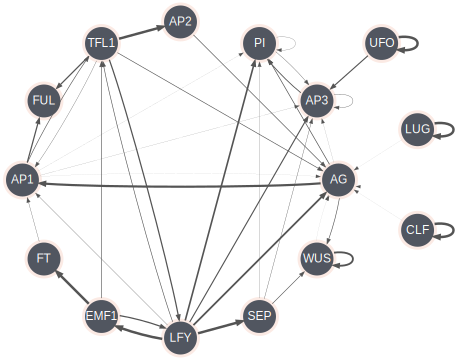

In [251]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false')
E.attr('node', shape='circle', fixedsize='true', width='.5', color='#fbeae4', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Teg.nodes(data=True):
    x,y = pos[node]
    xy = '%.1f,%.1f!' % (x/72,y/72)
    E.node(name=str(node), label=d['label'], pos=xy)

max_penwidth = 2.5
for s,t,d in Teg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
print 'Nodes: %d | Edges: %d' % (len(Teg.nodes()) , len(Teg.edges()) )
E #.render('thaliana-effective',cleanup=True)

Inputs: ['AP3', 'UFO', 'AP1', 'LFY', 'AG', 'PI', 'SEP']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#0\#\#\#0\# & 0 \\\hline 1 & 0\#\#0\#\#\# & 0 \\\hline 2 & \#\#000\#\# & 0 \\\hline 3 & \#\#\#0\#0\# & 0 \\\hline 4 & \#0\#\#\#\#0 & 0 \\\hline 5 & 00\#\#\#\#\# & 0 \\\hline 6 & \#\#\#0\#\#0 & 0 \\\hline 7 & \#00\#0\#\# & 0 \\\hline 8 & 1\#\#\#111 & 1 \\\hline 9 & \#1\#1\#\#\# & 1 \\\hline 10 & 1\#1\#\#11 & 1 \\\hline \hline \end{array},"Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \# \overset{\circ}{0} \# \overset{\circ}{\#} \# 0 \# \, | \, \overset{\circ}{\#} 0 \# \# \# \overset{\circ}{0} \overset{\circ}{\#} & 0 \\\hline 1 & \overset{\circ}{\#} \overset{\circ}{0} \# \overset{\circ}{\#} \# \overset{\circ}{0} \# & 0 \\\hline 2 & \# \overset{\circ}{0} \# \overset{\circ}{\#} \# \overset{\circ}{0} \overset{\circ}{\#} & 0 \\\hline 3 & \overset{\circ}{0} \overset{\circ}{\#} \# \overset{\circ}{0} \# \# \overset{\circ}{\#} & 0 \\\hline 4 & \# \overset{\circ}{\#} 0 \overset{\circ}{0} 0 \# \# & 0 \\\hline 5 & 1 \# \overset{\circ}{\#} \# \overset{\circ}{1} 1 1 & 1 \\\hline 6 & \#1\#1\#\#\# & 1 \\\hline \hline \end{array}",,


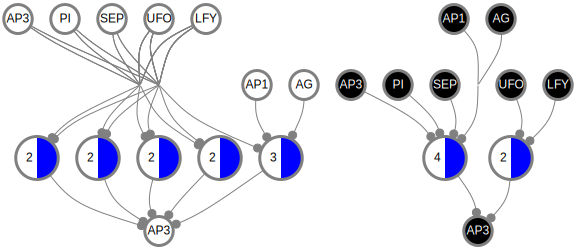

Inputs: ['UFO']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},,


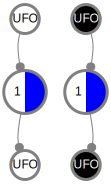

Inputs: ['AP1', 'TFL1']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1\# & 0 \\\hline 1 & \#1 & 0 \\\hline 2 & 00 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \overset{\circ}{1} \overset{\circ}{\#} & 0 \\\hline 1 & 00 & 1 \\\hline \hline \end{array},,


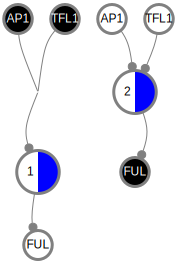

Inputs: ['EMF1']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1 & 0 \\\hline 1 & 0 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1 & 0 \\\hline 1 & 0 & 1 \\\hline \hline \end{array},,


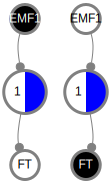

Inputs: ['FT', 'LFY', 'AG', 'TFL1']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#\#1\# & 0 \\\hline 1 & 00\#1 & 0 \\\hline 2 & \#\#00 & 1 \\\hline 3 & \#10\# & 1 \\\hline 4 & 1\#0\# & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#\#1\# & 0 \\\hline 1 & 00\#1 & 0 \\\hline 2 & \overset{\circ}{\#} \overset{\circ}{1} 0 \# & 1 \\\hline 3 & \#\#00 & 1 \\\hline \hline \end{array},,


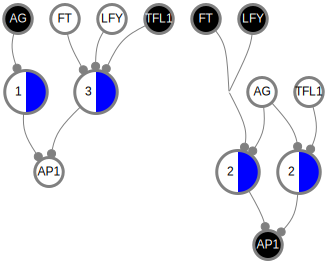

Inputs: ['LFY']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1 & 0 \\\hline 1 & 0 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1 & 0 \\\hline 1 & 0 & 1 \\\hline \hline \end{array},,


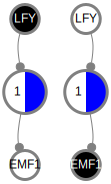

Inputs: ['FUL', 'AP1', 'EMF1', 'TFL1']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#\#11 & 0 \\\hline 1 & \#\#0\# & 1 \\\hline 2 & \#\#\#0 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#\#11 & 0 \\\hline 1 & \# \# \overset{\circ}{0} \overset{\circ}{\#} & 1 \\\hline \hline \end{array},,


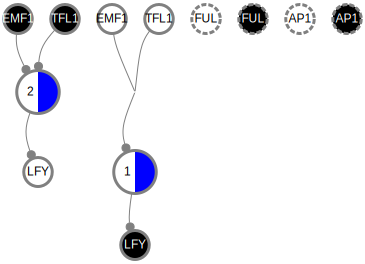

Inputs: ['TFL1']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1 & 0 \\\hline 1 & 0 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 1 & 0 \\\hline 1 & 0 & 1 \\\hline \hline \end{array},,


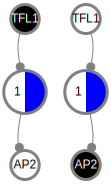

Inputs: ['WUS', 'AG', 'SEP']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0\#\# & 0 \\\hline 1 & \#11 & 0 \\\hline 2 & 10\# & 1 \\\hline 3 & 1\#0 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0\#\# & 0 \\\hline 1 & \#11 & 0 \\\hline 2 & 1 \overset{\circ}{0} \overset{\circ}{\#} & 1 \\\hline \hline \end{array},,


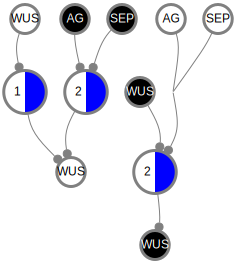

Inputs: ['AP1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'SEP']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#0\#\#\#\#\#1\# & 0 \\\hline 1 & 1\#10011\#\# & 0 \\\hline 2 & \#01\#\#\#\#\#\# & 0 \\\hline 3 & 1\#10\#11\#0 & 0 \\\hline 4 & \#1\#\#1\#\#\#1 & 1 \\\hline 5 & \#1\#\#\#\#0\#\# & 1 \\\hline 6 & \#10\#\#\#\#\#\# & 1 \\\hline 7 & \#\#0\#\#\#\#0\# & 1 \\\hline 8 & \#1\#\#\#0\#\#\# & 1 \\\hline 9 & 01\#\#\#\#\#\#\# & 1 \\\hline 10 & \#1\#1\#\#\#\#\# & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \# 0 \overset{\circ}{\#} \# \# \# \# \overset{\circ}{1} \# & 0 \\\hline 1 & 1 \# 1 0 \overset{\circ}{0} 1 1 \# \overset{\circ}{\#} & 0 \\\hline 2 & \overset{\circ}{\#} 1 \overset{\circ}{\#} \# \# \overset{\circ}{\#} \overset{\circ}{0} \# \# & 1 \\\hline 3 & \#1\#\#1\#\#\#1 & 1 \\\hline 4 & \#\#0\#\#\#\#0\# & 1 \\\hline 5 & \#1\#1\#\#\#\#\# & 1 \\\hline \hline \end{array},,


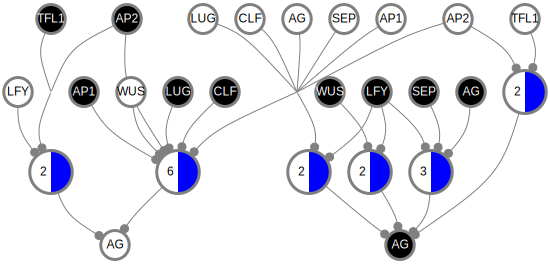

Inputs: ['LUG']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},,


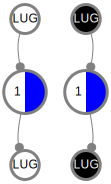

Inputs: ['CLF']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},,


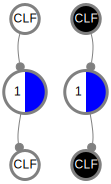

Inputs: ['AP1', 'EMF1', 'LFY', 'AP2']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#\#1\# & 0 \\\hline 1 & 1\#\#\# & 0 \\\hline 2 & \#0\#\# & 0 \\\hline 3 & 010\# & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \overset{\circ}{\#} \# \overset{\circ}{1} \# & 0 \\\hline 1 & \#0\#\# & 0 \\\hline 2 & 010\# & 1 \\\hline \hline \end{array},,


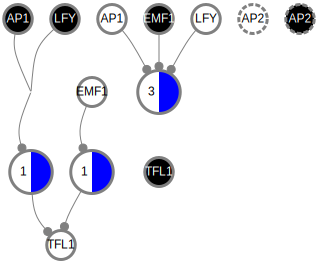

Inputs: ['AP3', 'AP1', 'LFY', 'AG', 'PI', 'SEP']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \#\#0\#\#0 & 0 \\\hline 1 & 0\#0\#\#\# & 0 \\\hline 2 & \#000\#\# & 0 \\\hline 3 & \#\#0\#0\# & 0 \\\hline 4 & 0\#\#0\#\# & 0 \\\hline 5 & 1\#\#111 & 1 \\\hline 6 & \#\#11\#\# & 1 \\\hline 7 & 1\#1\#\#\# & 1 \\\hline 8 & 11\#\#11 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & \overset{\circ}{\#} \overset{\circ}{\#} 0 \# \overset{\circ}{\#} \overset{\circ}{0} & 0 \\\hline 1 & \overset{\circ}{0} \# \overset{\circ}{0} \overset{\circ}{\#} \# \# & 0 \\\hline 2 & \overset{\circ}{\#} \# \overset{\circ}{0} \overset{\circ}{\#} \# \overset{\circ}{0} & 0 \\\hline 3 & \overset{\circ}{\#} \# \overset{\circ}{0} \overset{\circ}{\#} \overset{\circ}{0} \# & 0 \\\hline 4 & \overset{\circ}{\#} \# 1 \overset{\circ}{1} \# \# & 1 \\\hline 5 & 1 \overset{\circ}{\#} \# \overset{\circ}{1} 1 1 & 1 \\\hline \hline \end{array},,


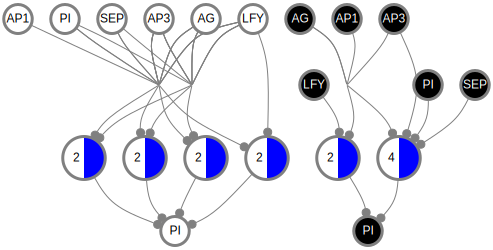

Inputs: ['LFY']


Prime Implicants\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},Two-Symbol Schemtas\begin{array}{ | c | r | l } \hline & In: & Out: \\ \hline 0 & 0 & 0 \\\hline 1 & 1 & 1 \\\hline \hline \end{array},,


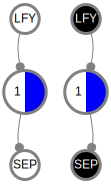

In [26]:
bound = 'upper'
for n in T.nodes:
    display(HTML('<h2>'+n.name+'</h2>'))
    print 'Inputs:',n.inputs
    k = n.k
    k_r = n.input_redundancy(mode='node',bound=bound,norm=False)
    k_r_n = n.input_redundancy(mode='node',bound=bound,norm=True)
    k_e = n.effective_connectivity(mode='node', bound=bound, norm=False)
    k_s = n.input_symmetry(mode='node',bound=bound,norm=False)
    k_s_n = n.input_symmetry(mode='node',bound=bound,norm=True)
    
    dfS = pd.DataFrame([('k',k),('k_r',k_r),('k_e',k_e),('k_s',k_s),('k_r*',k_r_n),('k_s*',k_s_n)]).set_index(0).T
    pi = n.schemata_look_up_table(type='pi',format='latex', ts_symbol_latex="\circ")
    ts = n.schemata_look_up_table(type='ts',format='latex', ts_symbol_latex="\circ")
    multi_column_display([pi,ts],titles=['Prime Implicants','Two-Symbol Schemtas'],cols=4)
    display(n.draw_full_canalizing_map())
    #break